# Introduction

In the digital age, the vast amount of data generated by images presents challenges in storage, transmission, and processing. Image quantization emerges as a crucial technique to address these challenges by reducing the size and complexity of images while preserving their essential visual characteristics. By grouping similar colors together, quantization enables more efficient representation of images, leading to reduced memory usage, faster transmission, and improved processing efficiency.

In this project, we explore the principles and applications of image quantization using the K-Means clustering algorithm. K-Means clustering partitions a set of data points into clusters based on similarity, making it well-suited for identifying dominant colors in images. By varying the number of clusters, we can control the level of color compression and assess its impact on image quality.

Through this project, we aim to:

  1. Implement image quantization using the K-Means algorithm and generate quantized images with different color palettes.

  2. Evaluate the quality of the quantized images using quantitative metrics such as Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and Structural Similarity Index (SSIM).

  3. Visualize and analyze the quantized images and evaluation results to gain insights into the effects of image quantization on image quality and fidelity.

  4. Demonstrate the reproducibility and scalability of the quantization process by encapsulating it into a reusable function, facilitating experimentation with different clustering configurations and evaluation methods.

By leveraging these techniques, we can gain a deeper understanding of image quantization and its implications for image processing, compression, and transmission. Through systematic evaluation and analysis, we aim to optimize the quantization process to achieve the desired balance between compression efficiency and visual quality.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as animation
from sklearn.cluster import KMeans

## Loading and Displaying an Image

This code snippet loads an image file named 'first.webp' using the `img.imread()` function from the `matplotlib.image` module.

### Loading the Image

```python
first = img.imread('first.webp')



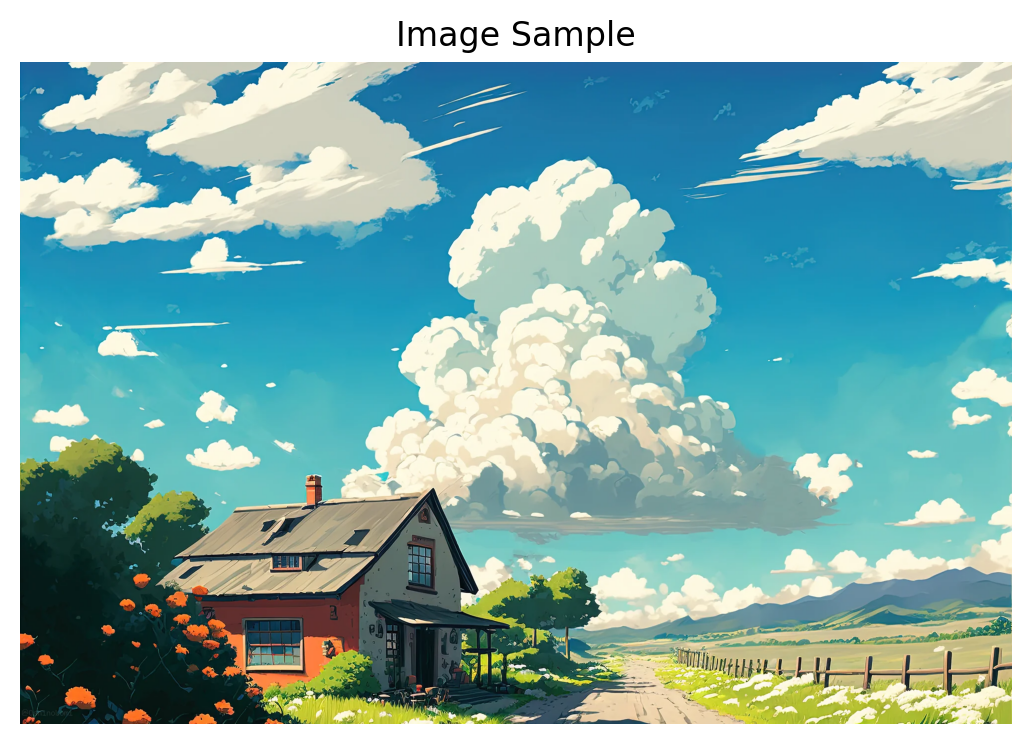

In [3]:
first = img.imread('first.webp')
plt.figure(dpi=200)
plt.imshow(first)
plt.title('Image Sample')
plt.axis('off')
plt.show()

## Converting Image to NumPy Array and Getting its Shape

This code snippet converts the loaded image `first` into a NumPy array and then retrieves its shape.

### Converting Image to NumPy Array

```python
imgarr = np.array(first)


In [4]:
imgarr = np.array(first)
imgarr.shape

(1333, 1998, 3)

## Reshaping Image Array

This code snippet reshapes the NumPy array representing the image (`imgarr`) into a 2D array with three columns, where each row represents a pixel in the image.

Reshaping the image array into a 2D array with three columns allows for efficient processing of pixel data using algorithms like K-Means clustering. This reshaping simplifies the representation of the image data, making it easier to apply mathematical operations and algorithms that operate on 2D arrays. Additionally, many machine learning algorithms expect input data in a specific format, and reshaping the image array to meet these requirements ensures compatibility and efficient processing.
### Reshaping Image Array

```python
reshaped_imgarr = imgarr.reshape(-1, 3)


In [5]:
reshaped_imgarr = imgarr.reshape(-1,3)
reshaped_imgarr.shape

(2663334, 3)

## Normalizing Image Data

This code snippet normalizes the pixel values in the reshaped image array (`reshaped_imgarr`) by dividing each pixel value by 255.

Dividing each pixel value by 255 scales the pixel values to the range [0, 1], which is a common practice in image processing and machine learning tasks. This normalization ensures that all pixel values are within a consistent range, making it easier to train machine learning models and apply certain algorithms effectively.

### Normalizing Image Data

```python
reshaped_imgarr = reshaped_imgarr / 255


In [6]:
reshaped_imgarr = reshaped_imgarr / 255
reshaped_imgarr

array([[0.07843137, 0.38039216, 0.6       ],
       [0.08235294, 0.38431373, 0.60392157],
       [0.09411765, 0.4       , 0.61960784],
       ...,
       [0.62745098, 0.69019608, 0.19607843],
       [0.6627451 , 0.71372549, 0.22352941],
       [0.69803922, 0.75294118, 0.2627451 ]])

## Applying K-Means Clustering to Image Data

This code snippet applies the K-Means clustering algorithm to the normalized image data (`reshaped_imgarr`) to find `k` dominant colors in the image.

### Why It's Done

Applying K-Means clustering to the image data helps identify the most representative colors in the image. By clustering similar pixel values together, K-Means enables us to find k distinct color centroids that best represent the diversity of colors present in the image. This is useful for tasks like color quantization, image segmentation, and color-based image retrieval, where reducing the number of colors in an image while preserving its visual quality is desired.


In [7]:
k = 8
kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 12)
kmeans.fit(reshaped_imgarr)

KMeans(n_init=10, random_state=12)

## Retrieving Cluster Centers and Labels

This code snippet retrieves the cluster centers and labels obtained from the K-Means clustering algorithm applied to the image data.

Overall, retrieving cluster centers and labels enables various downstream image processing tasks based on the results of K-Means clustering.

In [8]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

## Generating Quantized Image Array

This code snippet generates a quantized image array by replacing pixel values with their corresponding cluster center values and then scaling the values back to the original range.

This line replaces each pixel value in the image with the corresponding cluster center value. It uses the cluster centers obtained from K-Means clustering (cluster_centers) and assigns each pixel in the image to its nearest cluster center based on the cluster labels (labels

Generating the quantized image array allows for the creation of a compressed version of the original image with a reduced color palette. By replacing pixel values with their nearest cluster center values, the image can be represented using a smaller set of colors, leading to reduced memory usage and potentially smaller file sizes.

In [9]:
quantized_image_array = cluster_centers[labels]
quantized_image_array = (quantized_image_array * 255).astype(np.uint8)

## Reshaping Quantized Image Array

This code snippet reshapes the quantized image array (`quantized_image_array`) back to the original shape of the image.

Reshaping the quantized image array back to the original shape allows for the reconstruction of the quantized image with the reduced color palette. By restoring the correct dimensions of the image array, the pixel values can be visualized as an image using libraries like Matplotlib. This step is essential for displaying and analyzing the quantized image, enabling comparisons with the original image and assessing the effectiveness of the color quantization process.

In [10]:
quantized_image = quantized_image_array.reshape(imgarr.shape)

## Displaying the Quantized Image

This code snippet displays the quantized image using Matplotlib.

Displaying the quantized image allows for visual inspection of the result of the color quantization process. By visualizing the quantized image, you can observe the reduction in color complexity compared to the original image and assess the effectiveness of the color quantization algorithm in preserving visual quality while reducing the number of colors

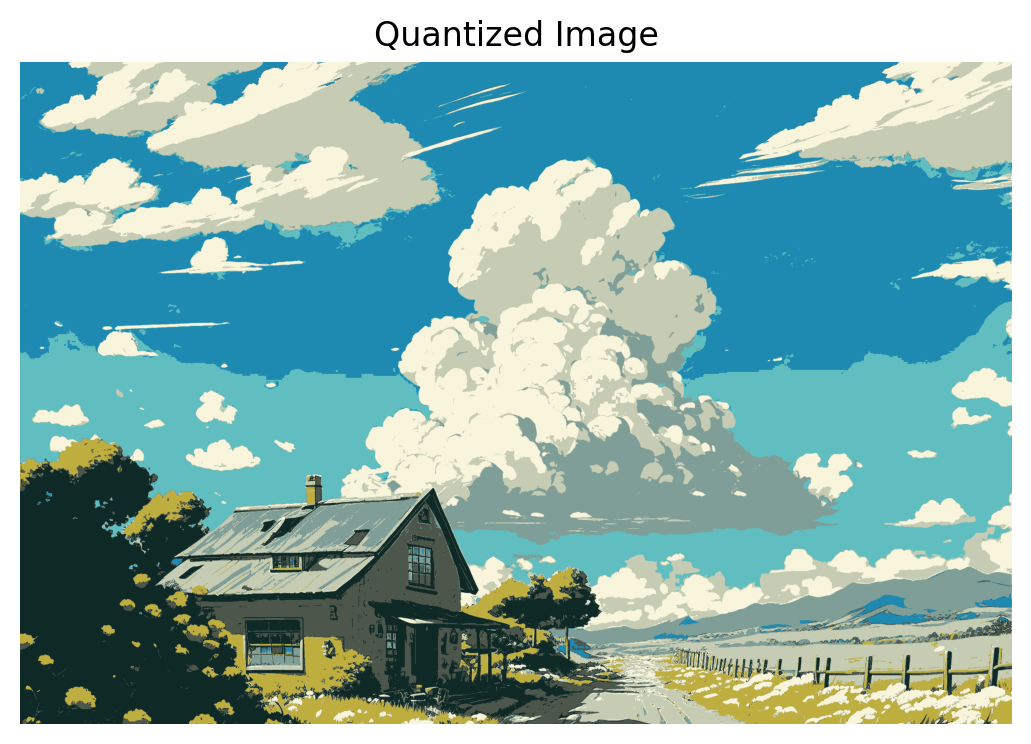

In [11]:
plt.figure(dpi = 200)
plt.imshow(quantized_image)
plt.title('Quantized Image')
plt.axis('off')
plt.show()

## Function to Quantize an Image

This function quantizes an image array by applying the K-Means clustering algorithm with a specified number of clusters (`k`). It normalizes the image data, fits the K-Means model, and generates a quantized image array based on the cluster centers and labels. Finally, it reshapes the quantized image array to match the original shape of the input image array.

### Function Parameters

- `image_array`: NumPy array representing the input image.
- `k`: Number of clusters (dominant colors) to identify.
- `random_state`: Seed for the random number generator to ensure reproducibility of the clustering results.

### Why It's Done

Encapsulating the image quantization process into a function allows for easy reproducibility and scalability. By parameterizing the function with the number of clusters (k) and the random state, it becomes straightforward to experiment with different values of k and ensure consistent results across multiple runs. This function can be reused with different images and k values to assess the impact of color quantization on image quality and size.

In [12]:
def quantize_image(image_array, k, random_state):
  reshaped_imgarr = imgarr.reshape(-1,3)
  reshaped_imgarr = reshaped_imgarr / 255
  kmeans = KMeans(n_clusters = k, n_init = 10, random_state = random_state)
  kmeans.fit(reshaped_imgarr)

  cluster_centers = kmeans.cluster_centers_
  labels = kmeans.labels_

  quantized_image_array = cluster_centers[labels]
  quantized_image_array = (quantized_image_array * 255).astype(np.uint8)

  quantized_image = quantized_image_array.reshape(imgarr.shape)

  return quantized_image

## Quantizing Images with Different Values of K

This code snippet quantizes an input image (`imgarr`) using different values of `k` (number of clusters) and stores the quantized images in a list.

### Looping Over Different Values of K

```
k_values = [2, 4, 8, 16, 32, 64]```

###  Why It's Done

By quantizing the input image with different values of k, this code snippet allows for an analysis of how the number of clusters affects the visual quality and color fidelity of the quantized images. Experimenting with various values of k helps in finding an optimal balance between reducing the number of colors and preserving the visual appearance of the image.

In [13]:
k_values = [2,4,8,16,32,64]

quantized_images = []


for k in k_values:
    quantized_image = quantize_image(imgarr, k, 42)
    quantized_images.append(quantized_image)


## Visualizing Quantized Images with Different Values of K

This code snippet visualizes the quantized images obtained with different values of `k` using subplots.

This includes:
1. Creating Subplots
2. Iterating over Quantized Images and Plotting
3. Hiding Empty Subplots
4. Showing the Plot

### Why It's Done

Visualizing the quantized images with different values of k allows for a comparative analysis of how the number of clusters affects the appearance of the quantized images. By arranging the quantized images in a grid of subplots, it becomes easier to observe the impact of different clustering configurations on the resulting images.

In [14]:
num_cols = 2  # Number of columns for the subplot grid
num_rows = (len(k_values) - 1) // num_cols + 1  # Number of rows for the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over quantized images and plot them
for i, (k, quantized_image) in enumerate(zip(k_values, quantized_images)):
    ax = axes[i // num_cols, i % num_cols] if len(k_values) > 1 else axes
    ax.imshow(quantized_image)
    ax.axis('off')
    ax.set_title(f'k = {k}')

# Hide empty subplots
for i in range(len(k_values), num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

## Creating Animation to Visualize Quantized Images

This code snippet creates an animation to visualize the sequence of quantized images obtained with different values of `k`.

### Why It's Done

Creating an animation provides a dynamic visualization of how the quantized images change as the number of clusters (k) varies. By displaying the sequence of quantized images as a video, it becomes easier to observe the effects of different clustering configurations on the visual appearance of the images.

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display, clear_output

# Create the figure and axes
fig, ax = plt.subplots()
ax.axis('off')

# Initialize the image with the first quantized image
im = ax.imshow(quantized_images[0])

# Function to update the image for each frame
def update_image(frame):
  im.set_data(quantized_images[frame])
  return fig,  # Return the entire figure for update

# Create the animation
ani = animation.FuncAnimation(fig, update_image, frames=len(quantized_images), interval=500)

# Display the animation as HTML5 video
html_video = HTML(ani.to_jshtml())


In [16]:
display(html_video)

# Conclusion

In this project, we implemented image quantization using the K-Means clustering algorithm and evaluated its effectiveness using various metrics. The process involved the following key steps:
### *Image Quantization:*
   We utilized the K-Means algorithm to cluster the colors in the input image (imgarr). By varying the number of clusters (k), we generated quantized images with different color palettes. This process allowed us to reduce the number of colors in the image while preserving its visual appearance.

### *Evaluation Metrics:*
We evaluated the quality of the quantized images using quantitative metrics such as Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and Structural Similarity Index (SSIM). These metrics provided objective measures of how well the quantized images approximated the original image, allowing us to assess the effectiveness of the quantization process.

### *Visualization and Analysis:*
 We visualized the quantized images and evaluation results using Matplotlib and provided insights into how different values of k impacted the visual quality and fidelity of the quantized images. Through visual inspection and analysis of evaluation metrics, we gained a deeper understanding of the effects of image quantization on image quality.

### R*eproducibility and Scalability:*
We encapsulated the image quantization process into a reusable function, allowing for easy reproducibility and scalability. By parameterizing the function with the number of clusters (k), we could easily experiment with different clustering configurations and evaluate their impact on image quality.

***In conclusion***, image quantization is a powerful technique for reducing the size and complexity of images while maintaining visual quality. By leveraging clustering algorithms and evaluation metrics, we can systematically analyze and optimize the quantization process to achieve the desired balance between image compression and fidelity. Through this project, we have gained valuable insights into the principles and applications of image quantization, laying the foundation for further exploration and refinement of image processing techniques.